## Analysis on Rental Price, Location and Facilities of LSE Accommodation Halls

## 1. Introduction

We are General Course students studying abroad at LSE, and being from different countries, most of us choose to live in a LSE accommodation hall during our stay in London. We recognize the need to streamline the accommodation searching process as it can be confusing. Those who have decided to pursue student accommodation instead of finding their own place have made, one, of the many choices to come as there are a plethora of options. The halls are not solely affiliated with LSE and are not located on campus but rather spread all across central London. Each hall is also unique in their location, facilities, catering system, and price; it can be challenging to match a hall to suit one’s needs.

Most new students resort to spreadsheets when trying to make horizontal comparisons between halls or opening millions of tabs until they have confused themselves over and over again. We are hoping to simplify this process so accommodation searching can be more time efficient and better suited for the incoming students. The current “Refine” bar searching system on the LSE Accommodation website gives some insight on the halls, but is not very effective or detailed without opening separate links for each hall. 

Our originality lies in deconstructing the original website to extract information and data for every LSE hall, and presenting information to students in a more effective way through visualization. We hope to solve the problems caused by the original design of the website that is not convenient enough, and let our project act as a supplementary tool for students choosing where to live. We will also evaluate each hall's worth and how the price of one might differ from another based on their locations and facilities that are being offered. From the motivation, here are the questions we are looking to explore.

Which is the hall that is best suited for my needs?  
1. What is the relationship between the prices of each hall and their distance to campus?
2. How do prices vary across different room types in each hall? 
3. Is the price worth what the hall provides in their facilities and catering system? 
4. What are other possible factors that might affect prices? 

## 2. Data Acquisition

To tackle our questions, we will need to pull information from the halls’ individual sites off the LSE Accommodation webpage. We can create multiple dataframes that address the prices, room types, facilities, distance and time it takes to reach campus, nearest tube station etc. Here are the following steps we took:

1. Extract the url of each hall from the LSE Accommodation search page  
We first pulled each hall's hyperlink from the LSE Accommodation search page (https://www.lse.ac.uk/student-life/accommodation/search-accommodation) and sorted it into a list to make scraping from individual sites with more detailed key facts easier.

In [1]:
from bs4 import BeautifulSoup
import requests

all_hyperlinks = []

for page_num in range(1, 3):
    url = f"https://www.lse.ac.uk/student-life/accommodation/search-accommodation?collection=lse-accommodation&pageIndex={page_num}&sort=metaavailability"
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        accommodation_titles = soup.find_all('h2', class_='card__title')
        hyperlinks = []
        for title in accommodation_titles:
            hyperlink = title.find('a')['href']
            hyperlinks.append(hyperlink)
        all_hyperlinks.extend(hyperlinks)

    except Exception as e:
        print("An error occurred:", e)

print(all_hyperlinks)

['http://www.lse.ac.uk/student-life/accommodation/halls/urbanest-westminster-bridge/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/lilian-knowles-house/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/college-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/international-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/butlers-wharf-residence/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/bankside-house/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/carr-saunders-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/connaught-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/high-holborn-residence/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/passfield-hall/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/nutford-house/home.aspx', 'http://www.lse.ac.uk/student-life/accommodation/halls/r

2. From each hyperlink, scrape information from individual webpages and combine into dataframes  
The information on the individual webpages are placed all across the page, so 3 different dataframes are created for different spaces.

Dataframe 1 offers information extracted from the webpage header, which includes accommodation name, address, a price range that gives basic insight and this accommodation’s distance to campus. Due to the causal relationship between distance and travel time, we also put the travel time extracted from the main body paragraphs in this dataframe.

Dataframe 2 goes deeper into detailed information of each room type in the hall, which are only included in the bottom half of the page. This dataframe contains data on specific room types, private or shared bathroom, size approximation of rooms and contract cost on a weekly basis.

Dataframe 3 focuses on the side bar of each webpage, offering data on total bed spaces and all the facilities this hall provides.

The scraping code and detailed steps are provided in 'Scraping Code and Creating Dataframes.ipynb'. Please note that based on different types of scraping results we got, we created sub-dataframes before merging them into the final three dataframes.

## 3. Data Preparation

Before converting the three dataframes into csv files, we did some basic cleaning on the raw dataframes, including filling in missing data, spliting string information into separate columns, uniforming symbols and wording, changing data types etc.

Before forming dataframe 1, we separated Stations into 4 columns rather than putting all stations in one column. We modified all stations refering to "King's Cross" into "King's Cross/St Pancras" and made sure they are having the same kind of apostrophe. We also changed the numerical information from object to float type.

In [2]:
import pandas as pd

file = 'data/distance_data.csv'
df1 = pd.read_csv(file)
df1

,Name,Address,Distance to Campus(km),Price Range(£/week),On Foot(min),By Bike(min),By Public Transport(min),Station 1,Station 2,Station 3,Station 4
0,urbanest Westminster Bridge,"urbanest Westminster Bridge, 203 Westminster B...",1.5,227-458,25,9,11,Westminster,Waterloo,Lambeth North,NaN
1,Lilian Knowles House,"Lilian Knowles House, 50 Crispin Street, Londo...",2.9,198-336,45,19,25,Liverpool Street,Shoreditch High Street,NaN,NaN
2,College Hall,"College Hall, University of London, Malet Stre...",1.2,289-392,22,8,16,Goodge Street,Euston Station,Russell Square,King's Cross/St Pancras
3,International Hall,"International Hall, University of London, Lans...",1.0,266-321,19,8,13,Russell Square,Holborn,Euston,King's Cross/St Pancras
4,Butler's Wharf Residence,"Butler's Wharf Residence, 11 Gainsford Street,...",3.2,127-278,51,22,34,London Bridge,Tower Hill,Bermondsey,NaN
5,Bankside House,"Bankside House, 24 Sumner Street, London, SE1 9JA",1.5,167-297,27,13,24,London Bridge,Southwark,NaN,NaN
6,Carr-Saunders Hall,"Carr-Saunders Hall, 18-24 Fitzroy Street, Lond...",1.6,173-259,28,11,23,Warren Street,Euston,NaN,NaN
7,Connaught Hall,"Connaught Hall, University of London, 36-45 Ta...",1.3,273-273,21,8,14,Euston Station,Euston Square,King's Cross/St Pancras,Russell Square
8,High Holborn Residence,"High Holborn Residence, 178 High Holborn, Lond...",0.5,184-333,11,4,10,Holborn,Covent Garden,NaN,NaN
9,Passfield Hall,"Passfield Hall, 1-7 Endsleigh Place, London, W...",1.5,129-287,23,10,15,Euston Square,Euston,NaN,NaN


For further analysis, here we created three new columns to represent the upper bound, lower bound and average prices for "Price Range(£/week)".

In [3]:
split_column = df1['Price Range(£/week)'].str.split('-', expand=True)
split_column = split_column.astype(float)
df1[['Price Min', 'Price Max']] = split_column
average = (df1['Price Min'] + df1['Price Max']) / 2
df1['Average Price'] = average
df1.head()

,Name,Address,Distance to Campus(km),Price Range(£/week),On Foot(min),By Bike(min),By Public Transport(min),Station 1,Station 2,Station 3,Station 4,Price Min,Price Max,Average Price
0,urbanest Westminster Bridge,"urbanest Westminster Bridge, 203 Westminster B...",1.5,227-458,25,9,11,Westminster,Waterloo,Lambeth North,NaN,227.0,458.0,342.5
1,Lilian Knowles House,"Lilian Knowles House, 50 Crispin Street, Londo...",2.9,198-336,45,19,25,Liverpool Street,Shoreditch High Street,NaN,NaN,198.0,336.0,267.0
2,College Hall,"College Hall, University of London, Malet Stre...",1.2,289-392,22,8,16,Goodge Street,Euston Station,Russell Square,King's Cross/St Pancras,289.0,392.0,340.5
3,International Hall,"International Hall, University of London, Lans...",1.0,266-321,19,8,13,Russell Square,Holborn,Euston,King's Cross/St Pancras,266.0,321.0,293.5
4,Butler's Wharf Residence,"Butler's Wharf Residence, 11 Gainsford Street,...",3.2,127-278,51,22,34,London Bridge,Tower Hill,Bermondsey,NaN,127.0,278.0,202.5


Before forming dataframe 2, we dropped the unit symbols, manually added some missing data in "Size Approximation(m²)" and modified each type under "Room Type" and "Bathroom Type" to make sure they can be grouped.

In [4]:
import pandas as pd

file = 'data/contract_data.csv'
df2 = pd.read_csv(file)
df2

,Name,Room Type,Bathroom Type,Price(£/week),Size Approximation(m²)
0,urbanest Westminster Bridge,Single room,Shared bathroom,285.23-310.76,8.5
1,urbanest Westminster Bridge,Single en suite room,Private bathroom,286.90-346.90,13.4
2,urbanest Westminster Bridge,Twin en suite room,Private bathroom,227.09-240.22,25.3
3,urbanest Westminster Bridge,Single studio,Private bathroom,420.03-458.32,22.1
4,Lilian Knowles House,Single en suite room,Private bathroom,198.86-242.35,8 - 14
5,Lilian Knowles House,Single studio,Private bathroom,263.59-303.15,12 - 22
6,Lilian Knowles House,One-bed flat,Private bathroom,303.15-336.43,21 - 27
7,College Hall,Single room,Shared bathroom,289.73,12
8,College Hall,Single en suite room,Private bathroom,332.43,14
9,College Hall,Double en suite room,Private bathroom,392.63,17


For further analysis, here we took the average for "Price(£/week)" and "Size Approximation(m²)" if it shows a range.

In [5]:
import numpy as np


def clean_price(price):
    if '-' in price:
        low, high = price.split('-')
        return (float(low.strip()) + float(high.strip())) / 2
    return float(price.strip())

def clean_size(size):
    if ' - ' in size:
        low, high = size.split(' - ')
        return (float(low.strip()) + float(high.strip())) / 2
    return float(size.strip())

df2['Size Approximation(m²)'] = df2['Size Approximation(m²)'].apply(clean_size)
df2['Price(£/week)'] = df2['Price(£/week)'].apply(clean_price)

decimal_places = 2
df2['Price(£/week)'] = df2['Price(£/week)'].round(decimal_places)
df2['Size Approximation(m²)'] = df2['Size Approximation(m²)'].round(decimal_places)
df2.head()

,Name,Room Type,Bathroom Type,Price(£/week),Size Approximation(m²)
0,urbanest Westminster Bridge,Single room,Shared bathroom,298.00,8.5
1,urbanest Westminster Bridge,Single en suite room,Private bathroom,316.90,13.4
2,urbanest Westminster Bridge,Twin en suite room,Private bathroom,233.66,25.3
3,urbanest Westminster Bridge,Single studio,Private bathroom,439.17,22.1
4,Lilian Knowles House,Single en suite room,Private bathroom,220.60,11.0


In [ ]:
Below is the finalized dataframe 3 before it was converted into a CSV. 

In [6]:
import pandas as pd

file = 'data/accommodation_info.csv'
df3 = pd.read_csv(file)
df3

,Hyperlink,Total Bed Spaces,Catered,Self-catered,Computer room,Self-service laundry,Printing facilities,Projector/Cinema room,Quiet study space,Lift access,Car parking,Communal TV,Common room,Non-smoking,24-hour staff cover,Secure entrance,Accessible rooms,WiFi,Bicycle storage
0,http://www.lse.ac.uk/student-life/accommodatio...,669,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
1,http://www.lse.ac.uk/student-life/accommodatio...,365,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1
2,http://www.lse.ac.uk/student-life/accommodatio...,28,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1
3,http://www.lse.ac.uk/student-life/accommodatio...,106,1,1,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1
4,http://www.lse.ac.uk/student-life/accommodatio...,280,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1
5,http://www.lse.ac.uk/student-life/accommodatio...,595,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
6,http://www.lse.ac.uk/student-life/accommodatio...,155,1,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1
7,http://www.lse.ac.uk/student-life/accommodatio...,26,1,0,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1
8,http://www.lse.ac.uk/student-life/accommodatio...,446,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,0
9,http://www.lse.ac.uk/student-life/accommodatio...,227,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1


When starting off, we initially scraped the webpage under the facilities tab of each accomodation and a list is formed for each hall like below. 

                                                                                                                      
Hyperlink: http://www.lse.ac.uk/student-life/accommodation/halls/lilian-knowles-house/home.aspx  
Room Types  :
Bed spaces in total 3  65
One bed flat   10
Single studi  o 31
Single en suit  e 324
Facil  ities:
24-hour staf  f cover
Bicycle   storage
Co  mmon room
C  ommunal TV
Co  mputer room  
Lift access  
Non-smoking
Print  ing facilities
  Secure entran  ce
Self-catered
Sel  f-ser  

                                                                                                                      
Now that we have all the info per hall, we need to make it usable to be able to work with the data and visualize it. vice laundry
WiFi

We created two new columns to split the kinds of rooms each hall had and the total number of bed spaces as they were currently all grouped together, as was the layout enforced it on the webpage. In order to handle the facilities for each hall, as some halls had certain facilities and it was listed but if they didnt, it wouldnt be listed. We coded a binary columns in the dataframe; 1 if the hall has it and 0 if the hall doesnt have it and dropped the original facilities column. 

## 4. Data Analysis

### 4.1 Exploratory Data Analysis (EDA)

First let us gain some basic insight on LSE accommodations. There are 14 different accommodation halls provided by LSE, each offering a number of different room types to choose. Sidney Webb House and Passfield Hall have the most types of rooms, while Connaught Hall only have one type of room.

In [7]:
df2['Name'].nunique()

14

In [8]:
df2.groupby('Name')['Room Type'].count()

Name
Bankside House                 3
Butler's Wharf Residence       3
Carr-Saunders Hall             4
College Hall                   3
Connaught Hall                 1
High Holborn Residence         4
International Hall             3
Lilian Knowles House           3
Nutford House                  2
Passfield Hall                 5
Rosebery Hall                  3
Sidney Webb House              5
The Garden Halls               4
urbanest Westminster Bridge    4
Name: Room Type, dtype: int64

In [9]:
df1.describe()

,Distance to Campus(km),On Foot(min),By Bike(min),By Public Transport(min),Price Min,Price Max,Average Price
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.807143,29.928571,12.357143,19.357143,205.285714,319.285714,262.285714
std,0.840755,12.523604,5.637882,6.957090,53.282164,57.931563,48.643014
min,0.500000,11.000000,4.000000,10.000000,127.000000,259.000000,202.500000
25%,1.350000,22.250000,8.250000,14.250000,169.250000,274.250000,217.750000
50%,1.550000,26.000000,10.500000,17.500000,191.000000,309.000000,262.750000
75%,2.500000,40.750000,17.500000,24.000000,256.250000,336.000000,289.750000
max,3.200000,51.000000,22.000000,34.000000,289.000000,458.000000,342.500000


In [10]:
df2.describe()

,Price(£/week),Size Approximation(m²)
count,47.000000,47.000000
mean,267.336809,14.933404
std,68.576250,5.608751
min,135.270000,6.400000
25%,225.800000,10.750000
50%,277.900000,14.000000
75%,317.350000,19.450000
max,439.170000,31.000000


In [11]:
df3.describe()

,Total Bed Spaces,Catered,Self-catered,Computer room,Self-service laundry,Printing facilities,Projector/Cinema room,Quiet study space,Lift access,Car parking,Communal TV,Common room,Non-smoking,24-hour staff cover,Secure entrance,Accessible rooms,WiFi,Bicycle storage
count,14.00000,14.000000,14.000000,14.000000,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.0,14.000000,14.0,14.000000
mean,277.00000,0.642857,0.500000,0.642857,1.0,0.642857,0.285714,0.428571,0.928571,0.071429,0.928571,1.0,1.0,1.0,1.0,0.500000,1.0,0.928571
std,209.38665,0.497245,0.518875,0.497245,0.0,0.497245,0.468807,0.513553,0.267261,0.267261,0.267261,0.0,0.0,0.0,0.0,0.518875,0.0,0.267261
min,26.00000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,0.000000,1.0,0.000000
25%,117.00000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,0.000000,1.0,1.000000
50%,253.50000,1.000000,0.500000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,0.500000,1.0,1.000000
75%,425.75000,1.000000,1.000000,1.000000,1.0,1.000000,0.750000,1.000000,1.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000
max,669.00000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.000000


### What is the relationship between the prices of each hall and their distance to campus?

From the line graph below, we can know that the average distance between halls and campus is 1.81km. High Holborn Residence is the closest to campus, while Butler's Wharf Residence is the furthest.

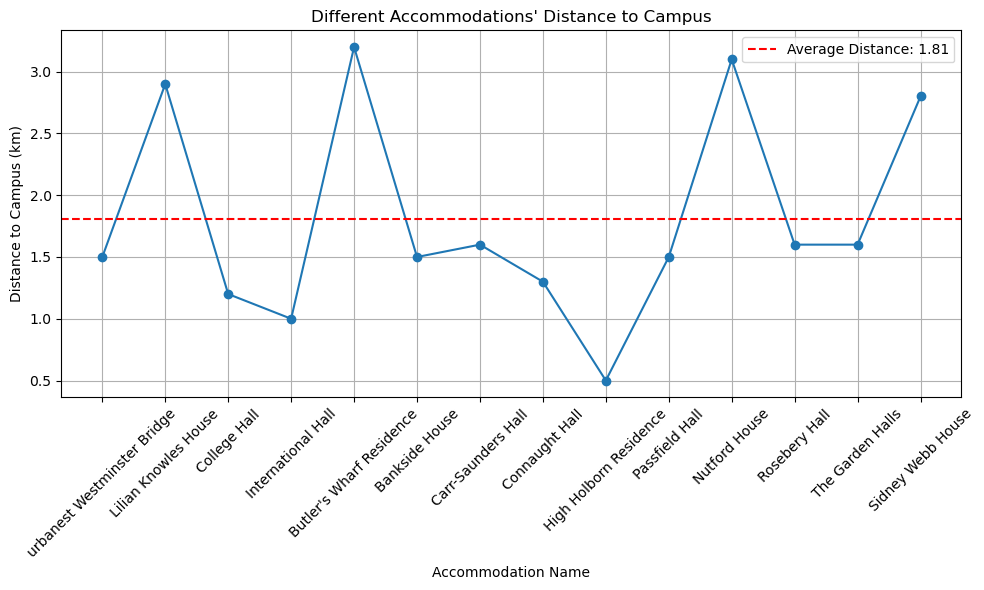

In [12]:
import matplotlib.pyplot as plt

avg_distance = df1['Distance to Campus(km)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(df1['Name'], df1['Distance to Campus(km)'], marker='o', linestyle='-')
plt.axhline(y=avg_distance, color='r', linestyle='--', label=f'Average Distance: {avg_distance:.2f}')
plt.title("Different Accommodations' Distance to Campus")
plt.xlabel('Accommodation Name')
plt.ylabel('Distance to Campus (km)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It is natrual to find that travel time by different modes of transportation is highly correlated with distance to campus. The change trend of travel time between different halls and campus is basically consistent with the waveform of distance to campus.

In [106]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

distance_data = df1[['Name', 'Distance to Campus(km)']].set_index('Name')

custom_colors = ['blue', 'green', 'red'] 

fig = px.bar(
    df1, 
    x='Name', 
    y=['On Foot(min)', 'By Bike(min)', 'By Public Transport(min)'],
    title='Travel time to Campus by Foot, Bike, and Public Transport',
    labels={'value': 'Time in Minutes', 'variable': 'Mode of Transport', 'Name': 'Halls'},
    barmode='group',
    color_discrete_sequence=custom_colors
)

fig.update_layout(
    xaxis_title='Accommodation Name',
    yaxis_title='Time in Minutes',
    legend_title='Modes of Transportation',
    xaxis_tickangle=-45
)

fig.add_trace(
    go.Scatter(
        x=distance_data.index,
        y=distance_data['Distance to Campus(km)'],
        mode='lines+markers',
        name='Distance to Campus',
        yaxis='y2'  
    )
)

fig.update_layout(
    yaxis2=dict(
        overlaying='y',
        side='right'
    )
)

fig.show()

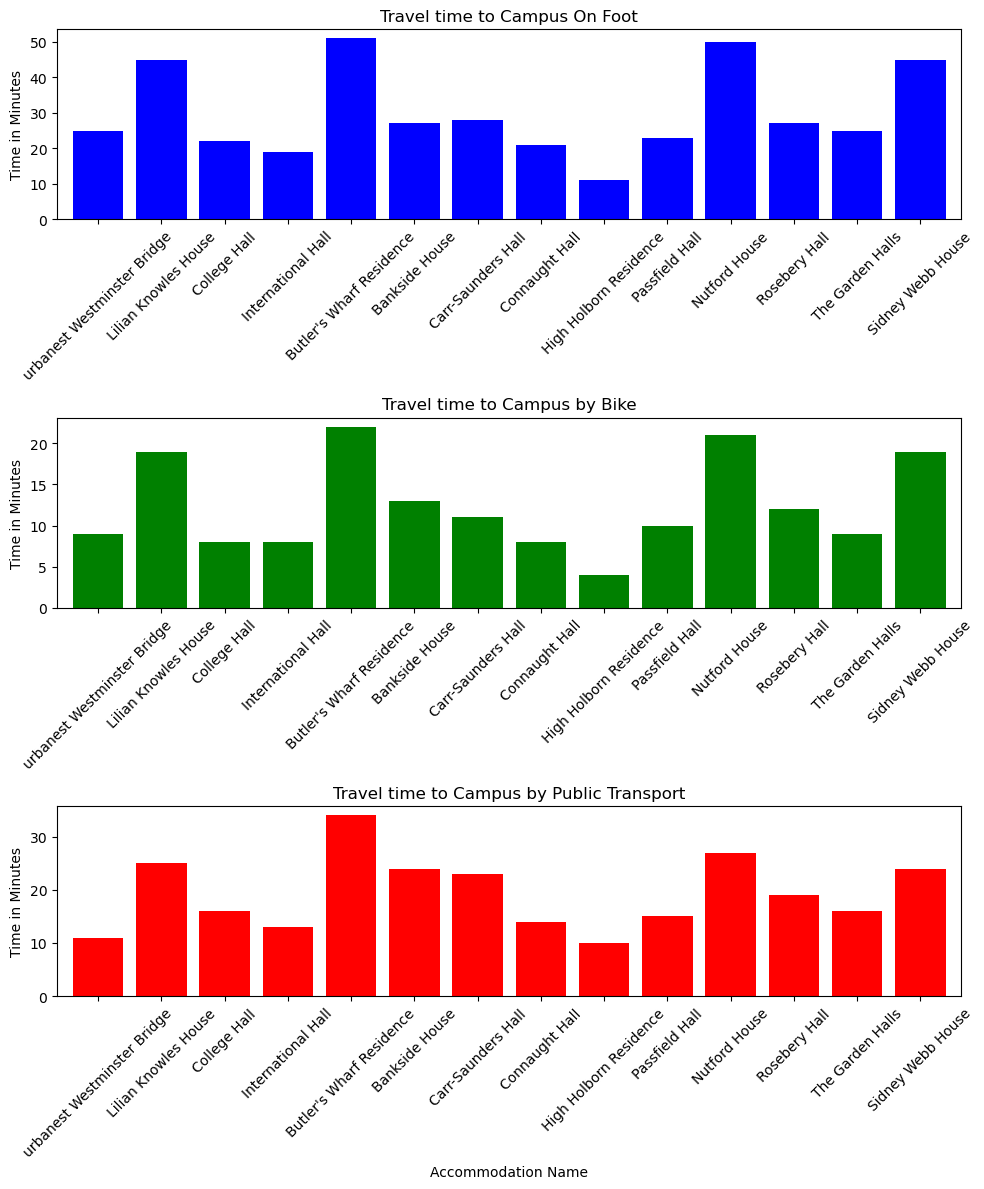

In [16]:
import matplotlib.pyplot as plt


plot_data = df1[['Name', 'On Foot(min)', 'By Bike(min)', 'By Public Transport(min)']].set_index('Name')


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))  


plot_data['On Foot(min)'].plot(kind='bar', width=0.8, ax=axes[0], color='b')
axes[0].set_title('Travel time to Campus On Foot')
axes[0].set_ylabel('Time in Minutes')

plot_data['By Bike(min)'].plot(kind='bar', width=0.8, ax=axes[1], color='g')
axes[1].set_title('Travel time to Campus by Bike')
axes[1].set_ylabel('Time in Minutes')

plot_data['By Public Transport(min)'].plot(kind='bar', width=0.8, ax=axes[2], color='r')
axes[2].set_title('Travel time to Campus by Public Transport')
axes[2].set_ylabel('Time in Minutes')


for ax in axes[:-1]:
    ax.set_xlabel('')
axes[-1].set_xlabel('Accommodation Name')


for ax in axes:
    ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

However, it is interesting to see that the correlation between public transport travel time and distance is not as high as the other two modes of transportaion, indicating that as the distance increases, the travel time by public transport also increases, but with some variability. Factors such as route congestion, stops, and schedules may influence public transport travel time beyond a simple linear relationship with distance.

In [13]:
distance = df1[['Distance to Campus(km)', 'On Foot(min)', 'By Bike(min)', 'By Public Transport(min)']]
correlation_matrix1 = distance.corr()
correlation_matrix1

,Distance to Campus(km),On Foot(min),By Bike(min),By Public Transport(min)
Distance to Campus(km),1.000000,0.995080,0.979606,0.863553
On Foot(min),0.995080,1.000000,0.988529,0.888489
By Bike(min),0.979606,0.988529,1.000000,0.916282
By Public Transport(min),0.863553,0.888489,0.916282,1.000000


Text(0.5, 1.0, 'Correlation Between Distance and Travel Time')

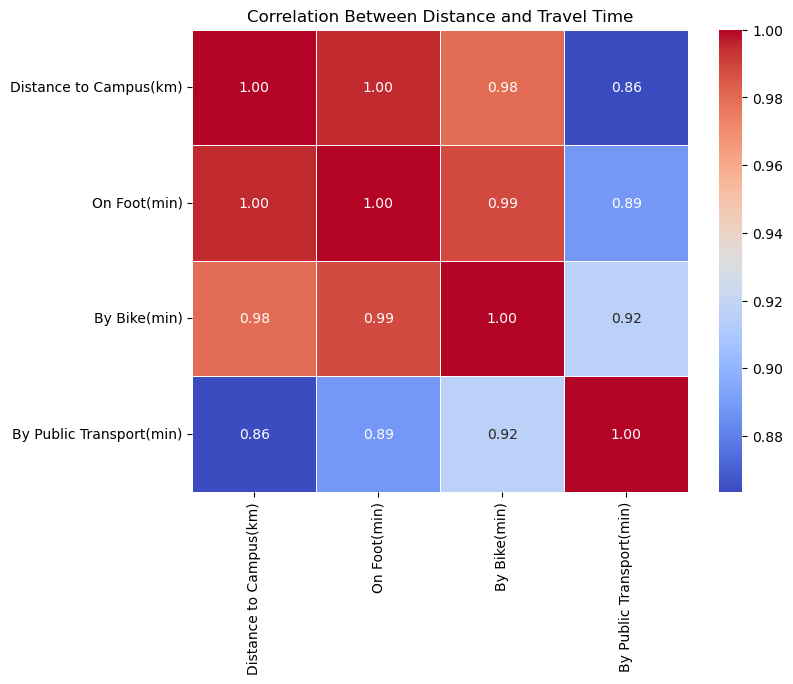

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Distance and Travel Time')

Now let us answer whether price of each hall is related to their distance to campus. We can see that distance is negatively correlated with all three aspects of prices. This means that as the distance to campus increases, the rent price tends to decrease moderately.  
Students seeking accommodation closer to campus may expect to pay higher rent prices compared to those living further away. This could be due to the convenience and proximity to academic buildings, amenities, and social activities on campus.

In [18]:
distance_price = df1[['Distance to Campus(km)', 'Price Min', 'Price Max', 'Average Price']]
correlation_matrix2 = distance_price.corr()
correlation_matrix2

,Distance to Campus(km),Price Min,Price Max,Average Price
Distance to Campus(km),1.000000,-0.355154,-0.234417,-0.334103
Price Min,-0.355154,1.000000,0.529610,0.863056
Price Max,-0.234417,0.529610,1.000000,0.885537
Average Price,-0.334103,0.863056,0.885537,1.000000


Text(0.5, 1.0, 'Correlation Between Distance and Travel Time')

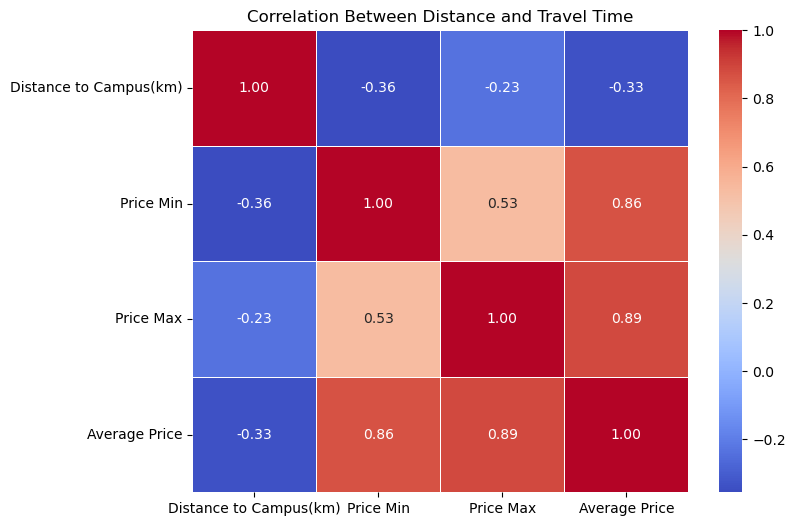

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Distance and Travel Time')

From the scatter plot below we can see that most of the accommodations are located within 2km of the campus. There are many halls at about 1.5km from campus, but the price difference between is rather wide.

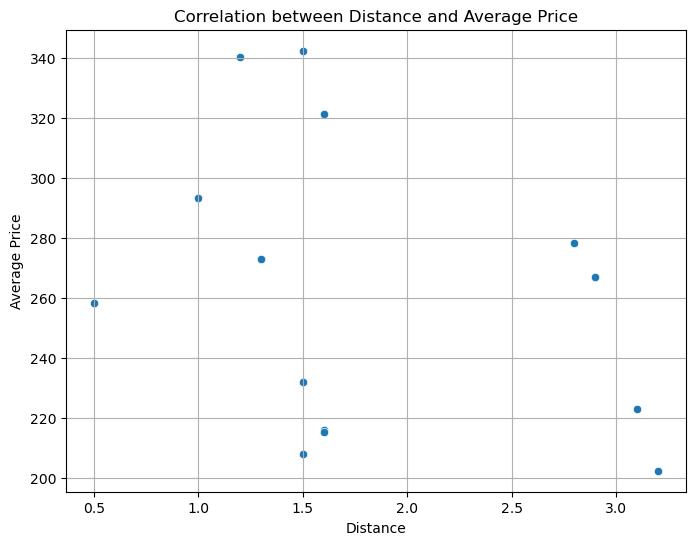

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Distance to Campus(km)', y='Average Price')
plt.title('Correlation between Distance and Average Price')
plt.xlabel('Distance')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

We can create a connection graph to better represent each hall's distance to campus. For more information, we also attached the closest tube stations to each hall. This offers us insight on the degree of concentration of the halls to some extent.

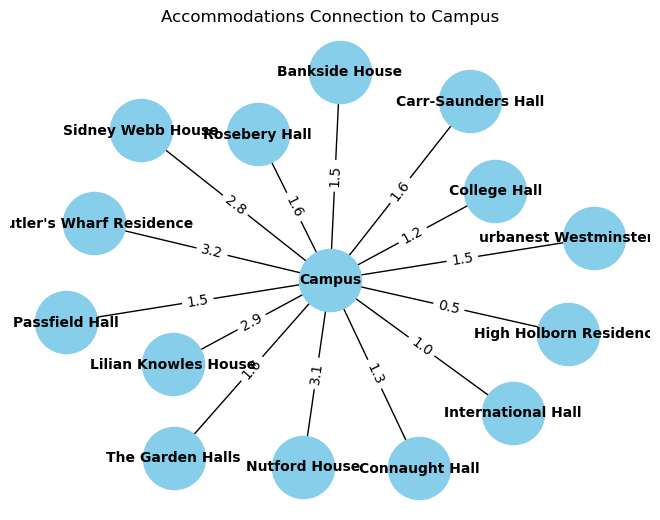

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

accommodations = df1[['Name','Distance to Campus(km)','Station 1', 'Station 2', 'Station 3', 'Station 4']]

G = nx.Graph()

for index, row in accommodations.iterrows():
    G.add_node(row['Name'], distance=row['Distance to Campus(km)'])

G.add_node("Campus")

for index, row in accommodations.iterrows():
    G.add_edge(row['Name'], "Campus", distance=row['Distance to Campus(km)'])

pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Accommodations Connection to Campus')
plt.show()

LSE is located at the heart of central London, therefore most of the accommodations it provides are also located around several major transportation hubs such as King's Cross/St Pancras and Euston Station. This map is very helpful for students who want to travel in London during their spare time.

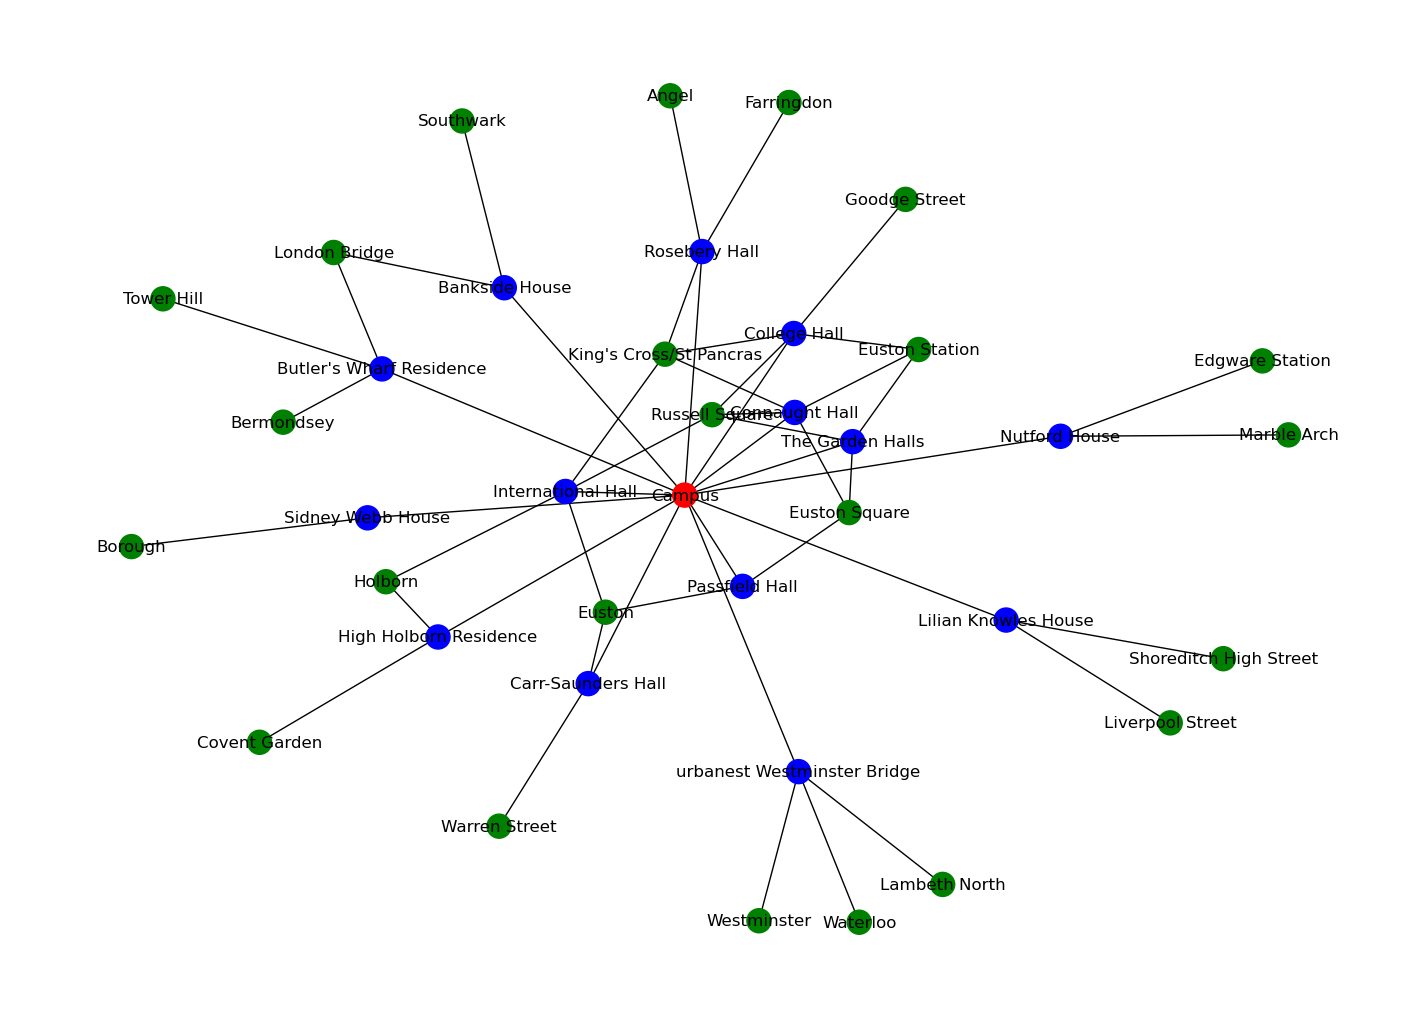

In [88]:
G = nx.Graph()

G.add_node('Campus', node_type='campus')  

for index, row in accommodations.iterrows():
    hotel_name = row['Name']
    G.add_node(hotel_name, node_type='hotel')
    for i in range(1, 5):
        station = row[f'Station {i}']
        if pd.notnull(station):  
            G.add_node(station, node_type='station')

for index, row in accommodations.iterrows():
    hotel_name = row['Name']
    G.add_edge('Campus', hotel_name)  
    for i in range(1, 5):
        station = row[f'Station {i}']
        if pd.notnull(station):  
            G.add_edge(hotel_name, station)  

pos = nx.spring_layout(G, k=0.3)  
node_colors = ['blue' if node_type == 'hotel' else 'green' if node_type == 'station' else 'red' for node_type in nx.get_node_attributes(G, 'node_type').values()]

plt.figure(figsize=(14, 10))  
nx.draw(G, pos, node_color=node_colors, with_labels=True)
plt.show()

### How do prices vary across different room types in each hall? 

In [22]:
df2['Bathroom Type'] = df2['Bathroom Type'].replace({'Shared bathroom': 0, 'Private bathroom': 1})
df2

,Name,Room Type,Bathroom Type,Price(£/week),Size Approximation(m²)
0,urbanest Westminster Bridge,Single room,0,298.00,8.50
1,urbanest Westminster Bridge,Single en suite room,1,316.90,13.40
2,urbanest Westminster Bridge,Twin en suite room,1,233.66,25.30
3,urbanest Westminster Bridge,Single studio,1,439.17,22.10
4,Lilian Knowles House,Single en suite room,1,220.60,11.00
5,Lilian Knowles House,Single studio,1,283.37,17.00
6,Lilian Knowles House,One-bed flat,1,319.79,24.00
7,College Hall,Single room,0,289.73,12.00
8,College Hall,Single en suite room,1,332.43,14.00
9,College Hall,Double en suite room,1,392.63,17.00


In [23]:
correlation = df2['Price(£/week)'].corr(df2['Size Approximation(m²)'])
correlation

-0.13495520908194583

In [24]:
type_price = df2[['Bathroom Type', 'Price(£/week)', 'Size Approximation(m²)']]
correlation_matrix3 = type_price.corr()
correlation_matrix3

,Bathroom Type,Price(£/week),Size Approximation(m²)
Bathroom Type,1.000000,0.336833,0.417159
Price(£/week),0.336833,1.000000,-0.134955
Size Approximation(m²),0.417159,-0.134955,1.000000


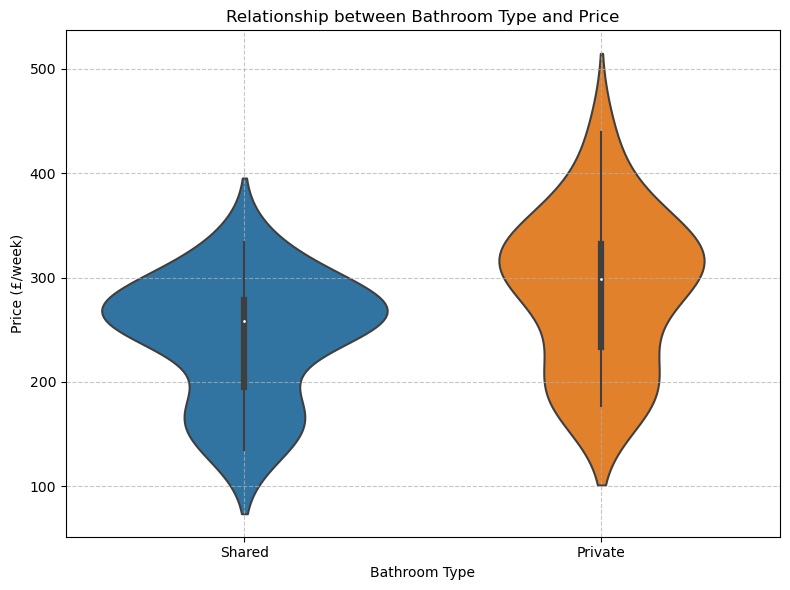

In [25]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Bathroom Type', y='Price(£/week)', data=df2)
plt.title('Relationship between Bathroom Type and Price')
plt.xlabel('Bathroom Type')
plt.ylabel('Price (£/week)')
plt.xticks([0, 1], ['Shared', 'Private'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

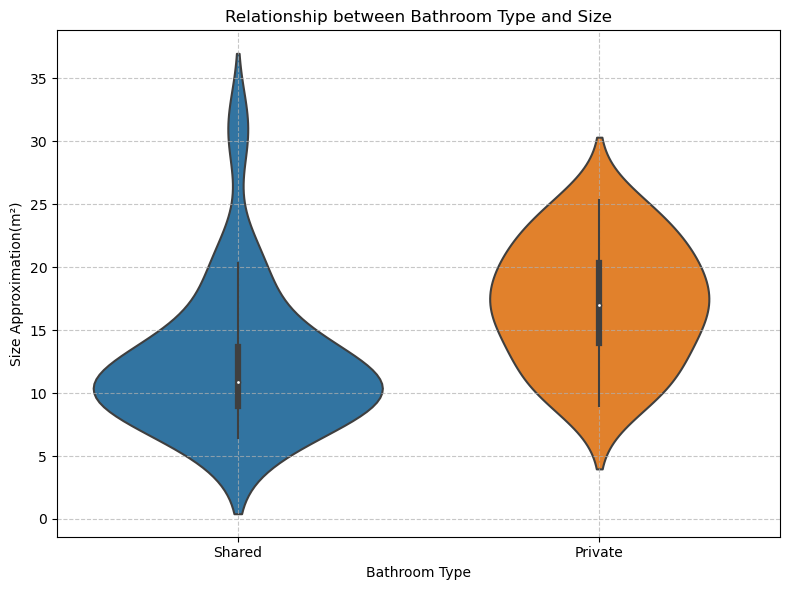

In [26]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Bathroom Type', y='Size Approximation(m²)', data=df2)
plt.title('Relationship between Bathroom Type and Size')
plt.xlabel('Bathroom Type')
plt.ylabel('Size Approximation(m²)')
plt.xticks([0, 1], ['Shared', 'Private'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

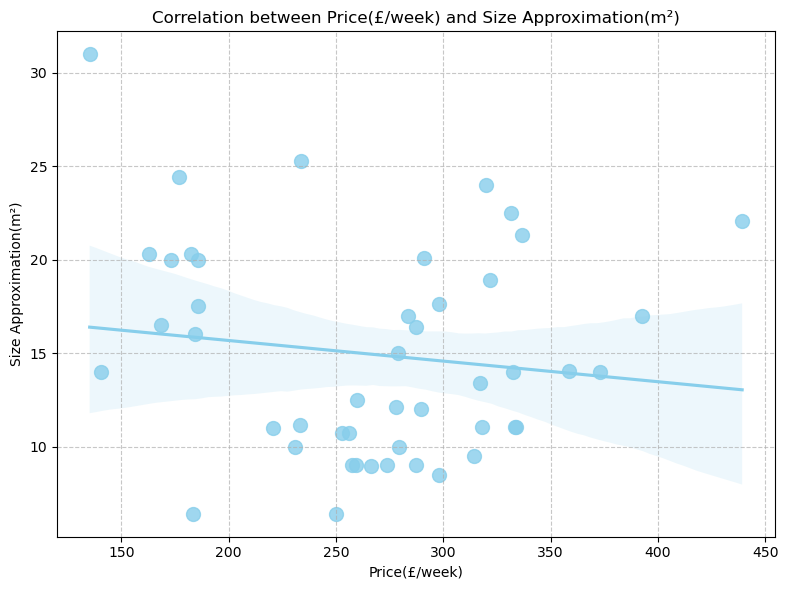

In [27]:
x_column = 'Price(£/week)'
y_column = 'Size Approximation(m²)'

plt.figure(figsize=(8, 6))
sns.regplot(x=x_column, y=y_column, data=df2, scatter_kws={'s': 100}, color='skyblue')
plt.title(f'Correlation between {x_column} and {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
columns_of_interest = ['Name', 'Price(£/week)', 'Size Approximation(m²)']
grouped = df2[columns_of_interest].groupby('Name')

correlation_by_group = grouped.corr().unstack()['Price(£/week)']['Size Approximation(m²)']
correlation_by_group

Name
Bankside House                -0.844141
Butler's Wharf Residence       0.014571
Carr-Saunders Hall            -0.993857
College Hall                   0.999854
Connaught Hall                      NaN
High Holborn Residence        -0.994707
International Hall             0.947745
Lilian Knowles House           0.980742
Nutford House                       NaN
Passfield Hall                -0.951189
Rosebery Hall                 -0.949116
Sidney Webb House              0.892968
The Garden Halls               0.900879
urbanest Westminster Bridge    0.043520
Name: Size Approximation(m²), dtype: float64

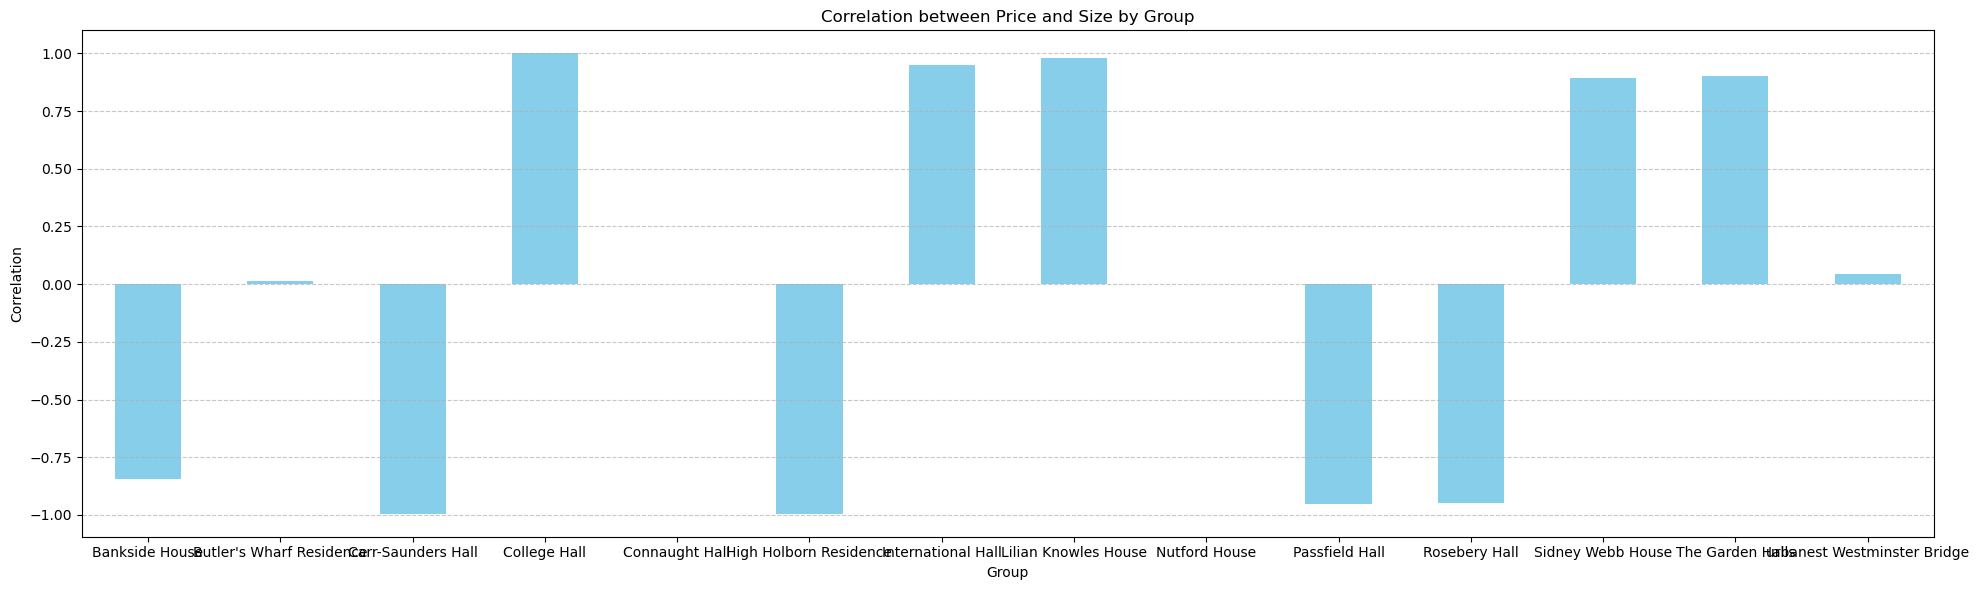

In [29]:
plt.figure(figsize=(20, 6))
correlation_by_group.plot(kind='bar', color='skyblue')
plt.title('Correlation between Price and Size by Group')
plt.xlabel('Group')
plt.ylabel('Correlation')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [30]:
df2['Room Type'] = df2['Room Type'].str.lower().str.strip()
grouped_df = df2.groupby(['Room Type', 'Name'])['Price(£/week)'].agg(list)
grouped_df

Room Type                   Name                       
3 bedroom flat              Sidney Webb House                               [277.9]
double en suite room        College Hall                                   [392.63]
                            Sidney Webb House                              [290.85]
double room                 Butler's Wharf Residence                       [278.95]
double studio               International Hall                             [321.93]
                            Sidney Webb House                               [336.7]
one-bed flat                Lilian Knowles House                           [319.79]
queen studio                Sidney Webb House                              [331.45]
single en suite room        Bankside House                                 [287.17]
                            College Hall                                   [332.43]
                            High Holborn Residence                          [333.2]
                    

In [31]:
import plotly.express as px
import pandas as pd


average_prices = df2.groupby('Name')['Price(£/week)'].mean().reset_index()
average_prices['Price(£/week)'] = average_prices['Price(£/week)'].round(2)


rainbow_colors = [
    '#FF0000',  
    '#FF7F00',  
    '#FFFF00',  
    '#00FF00',  
    '#0000FF', 
    '#4B0082', 
    '#9400D3'   
]


fig = px.bar(average_prices, x='Price(£/week)', y='Name', 
             title='Average Price by Accommodation',
             labels={'Price(£/week)': 'Average Price (£/week)', 'Name': 'Accommodation Name'},
             orientation='h', 
             color='Price(£/week)', 
             color_discrete_sequence=rainbow_colors)  

fig.show()

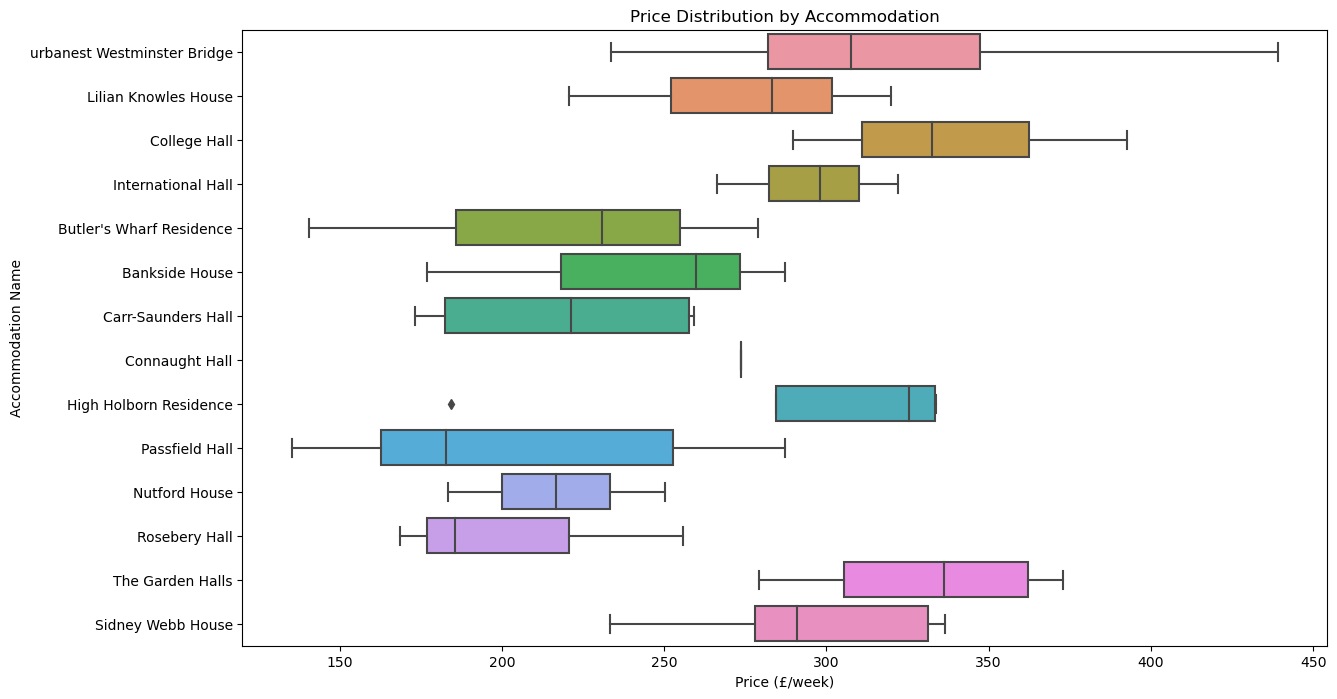

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))


sns.boxplot(x='Price(£/week)', y='Name', data=df2)

plt.title('Price Distribution by Accommodation')
plt.xlabel('Price (£/week)')
plt.ylabel('Accommodation Name')

plt.show()

The average prices of each hall is a good representation and preview of how prices of each accommodation may differ from each other. The interactive bar graph is also color-coated to help identify which hall fits in the student's price range on a per weekly basis. For permanent students, it would also be more effective compared with other alternatives as well.

On the other hand, the box and whiskers plot also gives important insight to how skewed the averages of each hall. An example is that urbanest Westminster Bridge also has cheaper options despite being on the higher end of the scale. A student may really enjoy the location and convenience, but rule the hall out due to its high average. Passfield all is another example of how the averages do not paint the full picture as some of their prices rival other halls as well.

In [33]:
import plotly.express as px
import pandas as pd

df2['Room Type'] = df2['Room Type'].str.lower().str.strip()

room_types = df2['Room Type'].unique()  

plots = []
for room_type in room_types:

    filtered_data = df2[df2['Room Type'] == room_type]
    

    average_prices = filtered_data.groupby('Name')['Price(£/week)'].mean().reset_index()
    
    if len(average_prices) >= 2:

        fig = px.bar(average_prices, x='Price(£/week)', y='Name', 
                 title=f'Price by Accommodation for {room_type}',
                 labels={'Price(£/week)': 'Average Price (£/week)', 'Name': 'Accommodation Name'},
                 orientation='h')
        plots.append(fig)


for plot in plots:
    plot.show()

In [34]:
plots = []
for room_type in room_types:

    filtered_data = df2[df2['Room Type'] == room_type]
    

    average_prices = filtered_data.groupby('Name')['Price(£/week)'].mean().reset_index()
    
    if len(average_prices) == 1:

        fig = px.bar(average_prices, x='Price(£/week)', y='Name', 
                 title=f'Price by Accommodation for {room_type}',
                 labels={'Price(£/week)': 'Average Price (£/week)', 'Name': 'Accommodation Name'},
                 orientation='h')
        plots.append(fig)


for plot in plots:
    plot.show()

When looking at specific room types offered at each hall and making the horizontal comparison, most halls offer a similar weekly package. However, there are still outliers with significant price differences that can sway the decision making process. The most common room type being the single room has prices upwards of £317 per week while other halls are offering £231 per week. These differences can be down to other factors in the hall such as distance to campus, facilities, and being catered or not. Looking at external components can also be a decisive factor when making the final decision if prices are too similar.

### Is the price worth what the hall provides in their facilities and catering system?

## 5. Conclusion

## 6. Reference

LSE Accommodation Website: https://www.lse.ac.uk/student-life/accommodation/search-accommodation